<a href="https://colab.research.google.com/github/jahnavi1thoom/unsupervised-ml/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [6]:
iris=load_iris()


In [7]:
x=iris.data
y=iris.target

In [8]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)

In [9]:
x.shape

(150, 4)

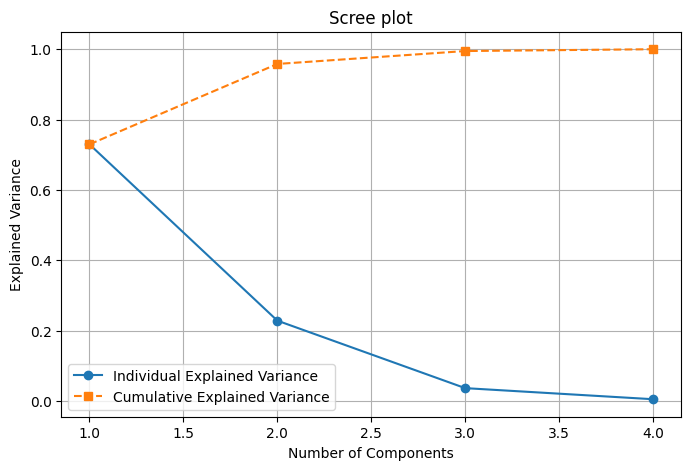

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

#scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label='Individual Explained Variance')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree plot')
plt.grid(True)
plt.legend()
plt.show()

# **choose number of components(95% varince)**

In [13]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"Reduced Shape:{x_reduced.shape}")


Reduced Shape:(150, 2)


**visualize top 2 components**

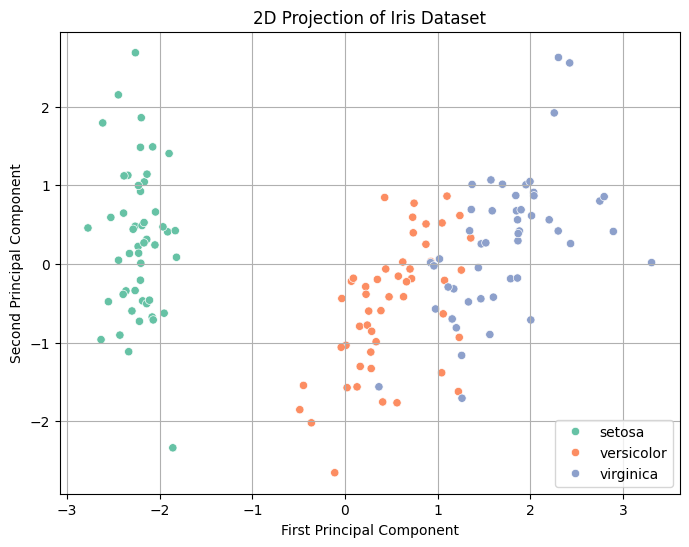

In [17]:
pca_2d=PCA(n_components=2)
x_ed=pca_2d.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_ed[:,0],y=x_ed[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Projection of Iris Dataset')
plt.grid(True)

plt.show()

Part 1 – Data Preparation
Load the dataset.
Select only numerical features relevant to customer behavior.
Handle missing values.
Standardize the data.
🔹 Part 2 – PCA Implementation
Apply PCA on the standardized dataset.
Plot the explained variance ratio.
Determine:
How many principal components are needed to retain at least 90% of total variance?
Reduce the dataset to those components.
🔹 Part 3 – Interpretation
Identify:
Which original features contribute most to PC1?
Which features dominate PC2?
Explain what PC1 and PC2 represent in business terms.
🔹 Part 4 – Practical Application
Visualize customers in 2D PCA space.
Now apply K-Means clustering on:
Original dataset
PCA-reduced dataset
Compare:
Silhouette score
Computation time
Cluster separation quality

In [27]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/marketing_campaign.csv'
df=pd.read_csv(path,sep="\t")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
df.dtypes


,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [36]:
#select numerical columns
x=df.select_dtypes(include=['float64','int64'])
#remove featurres which are not relevent to customer behaviour
x= df.drop(
    columns=['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'],
    errors='ignore'
)
df


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,3,4,5,0,0,0,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,2,5,7,0,0,0,1,0,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,3,13,6,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,5,10,3,0,0,0,0,0,0,0


In [37]:
x.isna().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [38]:
x['Income'].fillna(x['Income'].median(), inplace=True)


/tmp/ipython-input-3789756055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Income'].fillna(x['Income'].median(), inplace=True)


In [39]:
x.isna().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [42]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


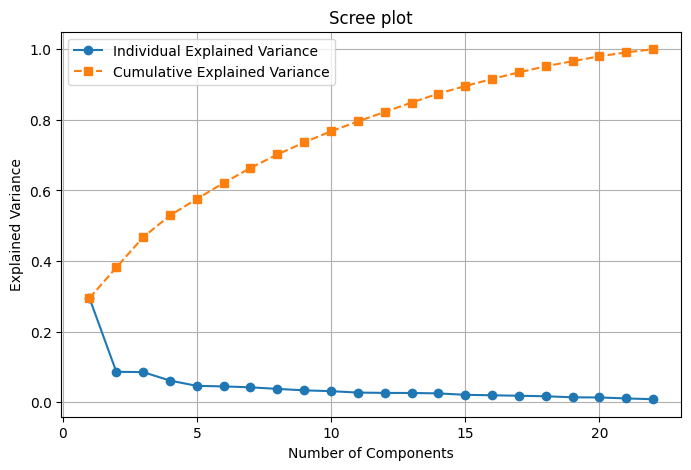

In [43]:
#PCA Implementation Apply PCA on the standardized dataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

#scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label='Individual Explained Variance')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree plot')
plt.grid(True)
plt.legend()
plt.show()


In [45]:
#How many principal components are needed to retain at least 90% of total variance? Reduce the dataset to those components.
pca_90=PCA(n_components=0.90)
x_reduced=pca_90.fit_transform(x_scaled)
print(f"Reduced Shape:{x_reduced.shape}")

Reduced Shape:(2240, 16)


In [47]:
import pandas as pd

loadings = pd.DataFrame(
    pca_90.components_.T,
    index=x.columns,
    columns=[f'PC{i+1}' for i in range(pca_90.n_components_)]
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Income,0.290615,0.030167,-0.057377,-0.140496,-0.076507,0.069578,0.108180,-0.278105,0.191188,0.018156,0.029674,-0.137970,-0.062147,-0.013829,0.605297,-0.050191
Kidhome,-0.253955,0.001046,0.100653,0.165709,0.141401,-0.021193,-0.390396,-0.136463,0.337488,0.073624,0.041344,-0.338513,-0.119135,0.214611,0.375319,-0.150115
Teenhome,-0.061695,0.400597,-0.325866,-0.126941,-0.075512,0.057276,0.312830,-0.224574,0.089981,0.440985,-0.022251,0.223859,-0.353753,-0.035866,-0.100578,-0.018660
Recency,0.000674,-0.040273,-0.104229,-0.274857,0.799666,-0.368859,-0.042916,-0.115644,-0.051513,-0.088120,-0.027626,0.219766,-0.082985,-0.176677,0.069392,-0.106604
MntWines,0.306155,0.259173,0.042098,-0.091954,0.020053,0.000249,0.023326,-0.066230,-0.103302,-0.195404,-0.026668,-0.202509,0.096069,-0.048411,-0.108528,-0.115063
MntFruits,0.268366,-0.184135,-0.112607,0.140623,0.016879,0.013204,-0.157004,0.190210,0.061641,0.084686,-0.226066,0.042756,-0.322979,0.088819,-0.143080,-0.514732
MntMeatProducts,0.313712,-0.129916,0.027307,0.033370,0.025287,0.011687,-0.103596,-0.194960,0.224319,-0.229775,0.002128,0.087021,0.162807,-0.021378,-0.103386,0.128132
MntFishProducts,0.277907,-0.195892,-0.101542,0.125581,0.022232,-0.023579,-0.175149,0.183464,0.076715,0.182623,-0.159721,0.124982,0.021017,0.148377,-0.061430,-0.028687
MntSweetProducts,0.270328,-0.154345,-0.096906,0.104724,0.044005,-0.026320,-0.197474,0.151350,0.015949,0.209246,-0.225388,-0.078662,-0.374689,-0.137624,0.032507,0.597368
MntGoldProds,0.221566,0.074713,-0.145642,0.264902,0.125366,-0.135163,0.079046,0.289029,-0.179640,0.123261,0.658316,0.137457,0.038102,0.395637,0.138077,-0.015925


In [48]:
#top fatures for PC1
loadings['PC1'].abs().sort_values(ascending=False)

,PC1
NumCatalogPurchases,0.318926
MntMeatProducts,0.313712
MntWines,0.306155
Income,0.290615
NumStorePurchases,0.282599
MntFishProducts,0.277907
MntSweetProducts,0.270328
MntFruits,0.268366
Kidhome,0.253955
NumWebVisitsMonth,0.248176


In [49]:
#top features for PC2
loadings['PC2'].abs().sort_values(ascending=False)


,PC2
NumDealsPurchases,0.454955
Teenhome,0.400597
NumWebPurchases,0.345110
AcceptedCmp4,0.340190
NumWebVisitsMonth,0.299521
MntWines,0.259173
AcceptedCmp2,0.238067
MntFishProducts,0.195892
MntFruits,0.184135
Response,0.170580


In [55]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_scaled)

print(x_2d.shape)


(2240, 2)


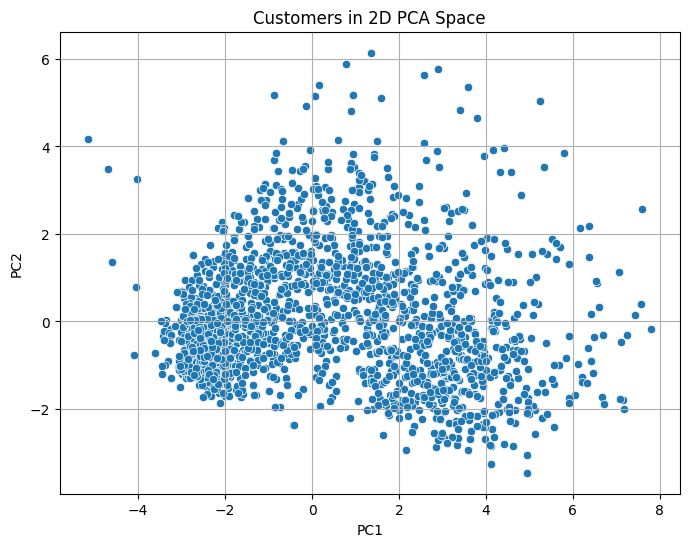

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0], y=x_2d[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customers in 2D PCA Space')
plt.grid(True)
plt.show()



In [59]:
#kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

# Original data
start_time = time.time()
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(x_scaled)
time_orig = time.time() - start_time

silhouette_orig = silhouette_score(x_scaled, labels_orig)

print("Original Data")
print("Silhouette Score:", silhouette_orig)
print("Computation Time:", time_orig)


Original Data
Silhouette Score: 0.2518081522365301
Computation Time: 0.11408782005310059


In [60]:
#kmeans on pca reduced dataset
# PCA-reduced data
start_time = time.time()
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(x_reduced)
time_pca = time.time() - start_time

silhouette_pca = silhouette_score(x_reduced, labels_pca)

print("\nPCA-Reduced Data")
print("Silhouette Score:", silhouette_pca)
print("Computation Time:", time_pca)



PCA-Reduced Data
Silhouette Score: 0.2605922829639705
Computation Time: 0.00677490234375


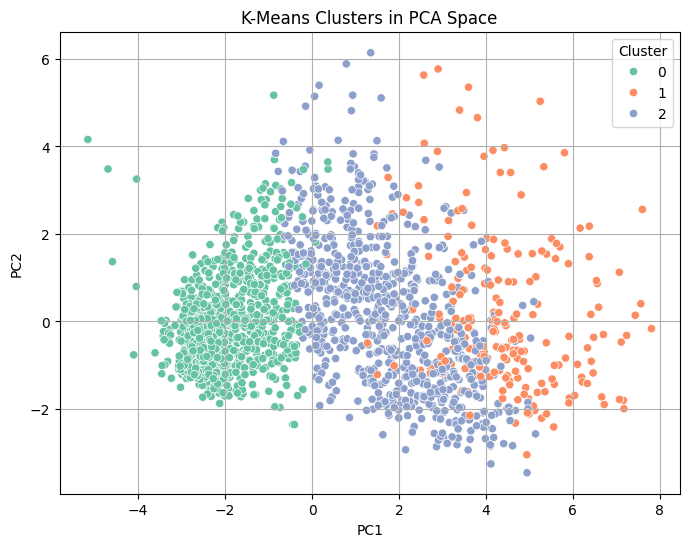

In [62]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=x_2d[:,0],
    y=x_2d[:,1],
    hue=labels_pca,
    palette='Set2'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters in PCA Space')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
